In [2]:
from melt_func import *
import chic_functions as cf
import matplotlib.pyplot as plt
import plotting_input as pf

In [4]:
sim_dir = "D:\\Geodynamo_Core_Simulation\\tc_251024_M1-5_Fe30-60"
data_name = "profs.res"

planets, texture = cf.core_data(sim_dir, data_name, getcore=True, colors=pf.cmap_viridis)

0 M1_Fe30_sFe6-5_p
1 M1_Fe60_sFe6-5_p
2 M2_Fe30_sFe6-5_p
3 M2_Fe60_sFe6-5_p
4 M3_Fe30_sFe6-5_p
5 M3_Fe60_sFe6-5_p
6 M4_Fe30_sFe6-5_p
7 M4_Fe60_sFe6-5_p
8 M5_Fe30_sFe6-5_p
9 M5_Fe60_sFe6-5_p
10 Plots
M1_Fe30_sFe6-5_p loaded
M1_Fe60_sFe6-5_p loaded
M2_Fe30_sFe6-5_p loaded
M2_Fe60_sFe6-5_p loaded
M3_Fe30_sFe6-5_p loaded
M3_Fe60_sFe6-5_p loaded
M4_Fe30_sFe6-5_p loaded
M4_Fe60_sFe6-5_p loaded
M5_Fe30_sFe6-5_p loaded
M5_Fe60_sFe6-5_p loaded


In [5]:
print(list(planets.keys()))
sim = list(planets.keys())
print(sim[-1:][0])

['M1_Fe30_sFe6-5_p', 'M1_Fe60_sFe6-5_p', 'M2_Fe30_sFe6-5_p', 'M2_Fe60_sFe6-5_p', 'M3_Fe30_sFe6-5_p', 'M3_Fe60_sFe6-5_p', 'M4_Fe30_sFe6-5_p', 'M4_Fe60_sFe6-5_p', 'M5_Fe30_sFe6-5_p', 'M5_Fe60_sFe6-5_p']
M5_Fe60_sFe6-5_p


In [6]:
n = len(planets[sim[-1:][0]]['P'])
P = np.linspace(0, planets[sim[-1:][0]]['P'][n-1], 1000)
print(n)

from scipy.integrate import trapz
# integrate with scipy T*r**2 dr
r = planets['M1_Fe30_sFe6-5_p']['r']
r = np.flip(r)
T = planets['M1_Fe30_sFe6-5_p']['T']

T_eff = np.pi*4*trapz(r, T * r**2) * 1 / (4/3 * np.pi * planets['M1_Fe30_sFe6-5_p']['r'][0]**3)

print(planets['M1_Fe30_sFe6-5_p']['r'][0], planets['M1_Fe30_sFe6-5_p']['T'][487])
print(np.average(T))
print(T_eff)

683
3066199.332581 7238.8450438
6732.766344702454
-6323.129516536514


C:\Users\louis\AppData\Local\Temp\ipykernel_37500\2980404723.py:11: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  T_eff = np.pi*4*trapz(r, T * r**2) * 1 / (4/3 * np.pi * planets['M1_Fe30_sFe6-5_p']['r'][0]**3)


C:\Users\louis\AppData\Local\Temp\ipykernel_37500\1730910316.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  xi = xini1 * planets[prof]['r'][0]**3 / (planets[prof]['r'][0]**3 - planets[prof]['r'][i]**3)


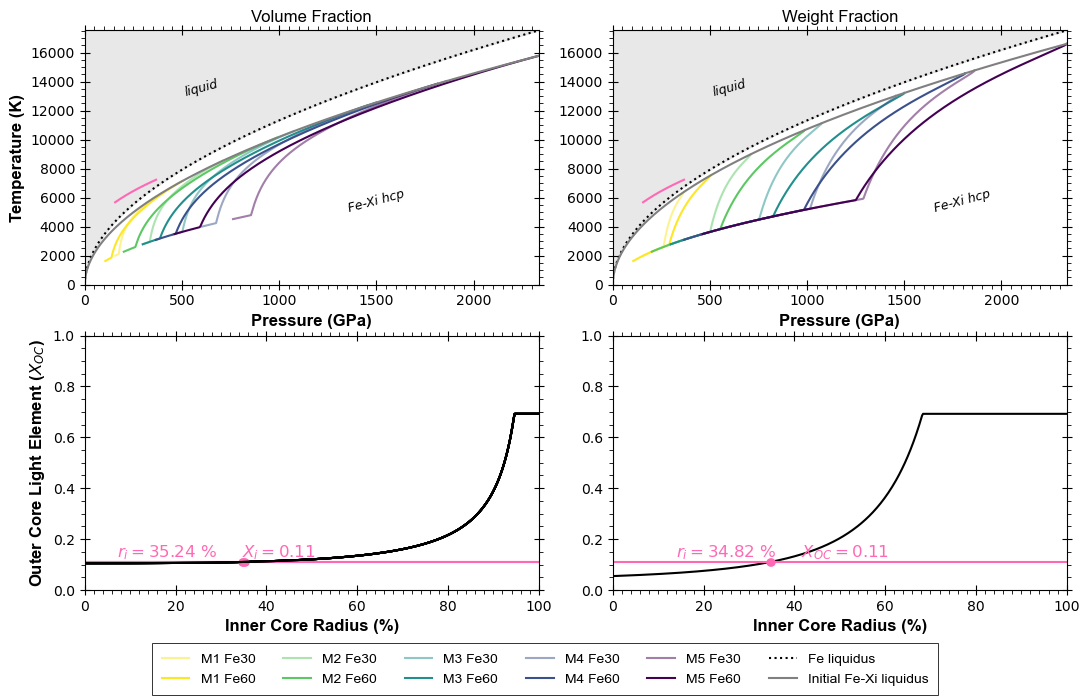

In [9]:
#print(T_m2014(65*1.0e9,0.0)-T_m2014(65*1.0e9,0.69239))
x0 = 0.11
xini1 = 0.1053
xini2 = 0.0545
wSi_IC = 0.05
wSi = 0.09
profs = list(planets.keys())
fig, ax = plt.subplots(2,2,figsize=(11, 7))
ax = ax.flatten()

for prof in profs:
    
    Tm1, Tm2, P_, xi_, xi_2 = [], [], [], [], []
    n = planets[prof]['n'][0]
    lbl = prof[:7].replace('_',' ')
    
    rho = np.array(planets[prof]['rho'][::-1])
    r = np.array(planets[prof]['r'][::-1])
    MC = np.trapz(rho*4*np.pi*r**2, x=r)
    for i in range(n):
        if i > 0 and i < n-1:
            MOC = np.trapz(rho[:i+1]*4*np.pi*r[:i+1]**2, x=r[:i+1])
            #xi2 = MC * wSi / MOC * 1/(1 + k * (MC - MOC) / MOC)
            WSi_OC = (MC * wSi - wSi_IC * (MC - MOC)) / MOC
            xi2 = WSi_OC * xini2 / wSi
        else:
            xi2 = xini2
        
        if xi2 > 0.69239 or i == 0:
            xi2 = 0.69239

        xi = xini1 * planets[prof]['r'][0]**3 / (planets[prof]['r'][0]**3 - planets[prof]['r'][i]**3)
        if xi > 0.69239:
            xi = 0.69239
        Tm1.append(T_m2014(planets[prof]['P'][i], x_light=xi))
        Tm2.append(T_m2014(planets[prof]['P'][i], x_light=xi2))
        P_.append(planets[prof]['P'][i])
        xi_.append(xi)
        xi_2.append(xi2)
        
    ax[0].plot(np.array(P_)*1e-9, np.array(Tm1), color = texture[prof]['color'], label = lbl, alpha = texture[prof]['alpha'])
    ax[1].plot(np.array(P_)*1e-9, np.array(Tm2), color = texture[prof]['color'], label = lbl, alpha = texture[prof]['alpha'])
    ax[2].plot(r[::-1]/r[n-1]*100,np.array(xi_), color = 'black')
    if prof == 'M4_Fe30_sFe6-5_p':
        ax[2].plot(r[::-1]/r[n-1]*100,np.ones(len(r))*x0, color = 'hotpink')
        ax[2].plot(r[::-1]/r[n-1]*100,np.ones(len(r))*x0, color = 'hotpink')
        ax[3].plot(r[::-1]/r[n-1]*100,np.array(xi_2), color = 'black')
        ax[3].plot(r[::-1]/r[n-1]*100,np.ones(len(r))*x0, color = 'hotpink')

        x = r[::-1]/r[n-1]*100
        y = np.array(xi_)
        idx = np.where(np.isclose(y, x0, atol=0.0002))[0]
        ax[2].plot(x[idx], y[idx], color='hotpink', marker='o', markersize=5)
        ax[2].text(7, 0.13, r'$r_i = $'+f'{x[idx][0]:.4} %     '+r'$X_i = $'+f'{x0}', fontsize=12, color='hotpink')

        x = r[::-1]/r[n-1]*100
        y = np.array(xi_2)
        idx = np.where(np.isclose(y, x0, atol=0.001))[0]
        ax[3].plot(x[idx], y[idx], color='hotpink', marker='o', markersize=5)
        ax[3].text(14, 0.13, r'$r_i = $'+f'{x[idx][0]:.4} %     '+r'$X_{OC} = $'+f'{x0}', fontsize=12, color='hotpink')

ax[0].plot(P*1e-9, T_m2014(P,0), color = 'black', linestyle=':', label = 'Fe liquidus')
ax[1].plot(P*1e-9, T_m2014(P,0), color = 'black', linestyle=':', label = 'Fe liquidus')
ax[0].plot(P*1e-9, T_m2014(P,xini1), color = 'gray', label = 'Initial Fe-Xi liquidus')
ax[1].plot(P*1e-9, T_m2014(P,xini2), color = 'gray')

handles, labels = [], []
for j in range(4):
    h, l = ax[j].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

for j in range(4):
    if j == 0 or j == 1:
        xtick, ytick = 50, 500
        xlabel, ylabel = 'Pressure (GPa)', 'Temperature (K)'
        sca = True
    else:
        xtick, ytick = 2, 0.05
        xlabel, ylabel = r'Inner Core Radius (%)', r'Outer Core Light Element ($X_{OC}$)'
        sca = False
    
    ax[j].set_xlabel(xlabel, fontweight='bold', font='Arial', fontsize=12)
    if j % 2 == 0:
        ax[j].set_ylabel(ylabel, fontweight='bold',font='Arial', fontsize=12)
    ax[j].tick_params(axis='both', which='major', length=7, direction='inout', top=True, right=True)
    ax[j].tick_params(axis='both', which='minor', length=3, direction='out', top=True, right=True)
    ax[j].xaxis.set_minor_locator(plt.MultipleLocator(xtick))
    ax[j].yaxis.set_minor_locator(plt.MultipleLocator(ytick))
    ax[j].autoscale(tight=sca)

ax[0].fill_between(P*1.0e-9, T_m2014(P,0), T_m2014(P)[999], where=(T_m2023(P) < T_m2014(P)[999]), interpolate=True, color='lightgray', alpha=0.5)
ax[1].fill_between(P*1.0e-9, T_m2014(P,0), T_m2014(P)[999], where=(T_m2023(P) < T_m2014(P)[999]), interpolate=True, color='lightgray', alpha=0.5)

ax[0].plot(planets['M1_Fe30_sFe6-5_p']['P']*1e-9, planets['M1_Fe30_sFe6-5_p']['T'], color = 'hotpink', linestyle='-', label = 'M1')
ax[1].plot(planets['M1_Fe30_sFe6-5_p']['P']*1e-9, planets['M1_Fe30_sFe6-5_p']['T'], color = 'hotpink', linestyle='-', label = 'M1')
ax[0].text(600, 13000, 'liquid', horizontalalignment='center', fontsize=9, color='black', fontstyle='italic', rotation=15)
ax[1].text(600, 13000, 'liquid', horizontalalignment='center', fontsize=9, color='black', fontstyle='italic', rotation=15)
ax[0].text(1500, 5000, 'Fe-Xi hcp', horizontalalignment='center', fontsize=9, color='black', fontstyle='italic', rotation=15)
ax[1].text(1800, 5000, 'Fe-Xi hcp', horizontalalignment='center', fontsize=9, color='black', fontstyle='italic', rotation=15)

ax[0].set_title('Volume Fraction', fontweight='bold', font='Arial', fontsize=12)
ax[1].set_title('Weight Fraction', fontweight='bold', font='Arial', fontsize=12)
#ax[0].set_ylim(0, 17500)
#ax[1].set_ylim(0, 17500)
ax[2].set_xlim(0, 100)
ax[2].set_ylim(0, 1)
ax[3].set_xlim(0, 100)
ax[3].set_ylim(0, 1)
unique_handles_labels = dict(zip(labels, handles))
handles, labels = unique_handles_labels.values(), unique_handles_labels.keys()
legend = fig.legend(handles=handles, labels=labels, loc='lower center',ncols = 6, fontsize=12, prop={'family': 'Arial'})
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.7)
legend.get_frame().set_boxstyle("Square")
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, bottom=0.15)

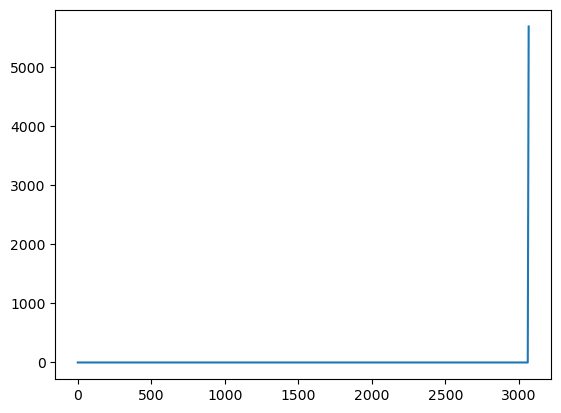

In [ ]:
import scipy as sp
P = planets['M1_Fe30_sFe6-5_p']['P']
r = planets['M1_Fe30_sFe6-5_p']['r']
alpha = planets['M1_Fe30_sFe6-5_p']['alpha']
T = planets['M1_Fe30_sFe6-5_p']['T']
Cp = planets['M1_Fe30_sFe6-5_p']['Cp']
g = planets['M1_Fe30_sFe6-5_p']['g']
r = r[::-1]
n = len(r)


Tc = T[0]
T[0] = Tc
for i in range(n):
Ta = planets['M1_Fe30_sFe6-5_p']['T'][0] * np.exp(-x)

plt.plot(r/1000,Ta)